# How do I quantify the uniformity of sampling time?

https://stats.stackexchange.com/questions/how-do-i-quantify-the-uniformity-of-sampling-time

In [1]:
%pylab inline
from __future__ import division
import scipy as sp
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)
np.random.seed(42)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def calculate_shannon_entropy(p):
    ''' 
    Parameters
    ----------
    p: list
        list of probability values such that sum(p) = 1
    Returns
    -------
    entropy: float
        Shannon Entropy        
    '''
    assert np.allclose(sum(p), 1)
    entropy = -np.nansum(np.array(p) * np.log2(np.array(p)).T)
    return entropy

def calculate_uniformity_index(x, a, b):
    '''
    Parameters
    ----------
    '''

## Entropy is maximal for a uniform distribution

/home/saket/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log2
/home/saket/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in multiply


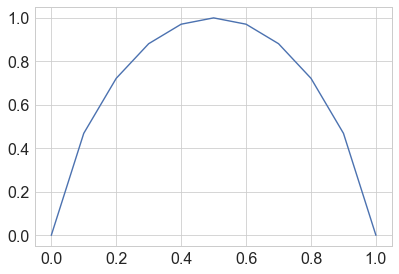

In [3]:
plt.plot(np.arange(0, 1.1, 0.1), [calculate_shannon_entropy([x, 1-x]) for x in np.arange(0, 1.1, 0.1)])

## Entropy increase monotonically with sample size for a uniform distribution

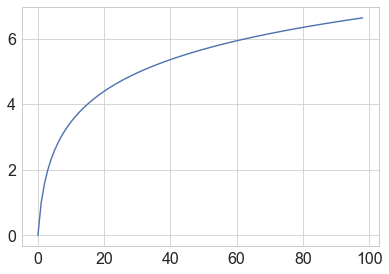

In [4]:
entropies = []

for n in range(1, 100):
    p_vec = [1/n] * n 
    entropies.append(calculate_shannon_entropy(p_vec))

plt.plot(entropies)
    

-2.3820635625174496

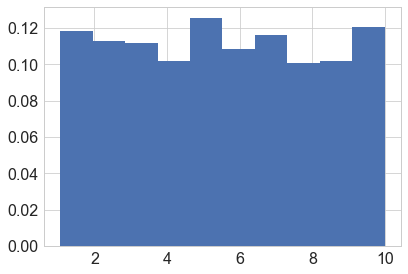

In [31]:
## Uniform index
hist_bins = 20

s = np.random.uniform(1,10,1000)
count, bins, ignored = plt.hist(s, 10, normed=True)

count, boundaries = np.histogram(s, bins=1000)
normalized_count = count/np.sum(count)

U = np.sqrt(1+(10-1)**2)/np.sum(np.sqrt(1+normalized_count**2))
(U-0.707)/(1-0.707)

## Uniformity index 
https://arxiv.org/pdf/1508.01146.pdf defines uniformity index as :
        $$
        \mathcal{U}(f_X) = \frac{\sqrt{1+(b-a)^2}}{\sqrt{1+[f_X(t)]^2}dt}
        $$

In [43]:
count, boundaries = np.histogram(s, bins=1000, density=True)


In [48]:
sum(np.diff(boundaries)*count)

1.0

In [50]:
#denom = np.trapz(np.sqrt(1+count**2), np.diff(boundaries))
denom = sum(np.diff(boundaries)*np.sqrt(1+count**2))
denom

9.0467435677217765

In [51]:
U = np.sqrt(1+(10-1)**2)/denom
(U-0.707)/(1-0.707)

1.003260113892593

In [52]:
s[np.where( (s>7) & (s<9) )] = 0

In [54]:
#count = np.histogram(s)
#normalized_count = count[0]/np.sum(count[0])
count, boundaries = np.histogram(s, bins=1000, density=True)

U = np.sqrt(1+(10-1)**2)/np.sum(np.sqrt(1+normalized_count**2))

In [56]:
denom = sum(np.diff(boundaries)*np.sqrt(1+count**2))

U = np.sqrt(1+(10-1)**2)/denom
(U-0.707)/(1-0.707)

0.59534182460272966

In [ ]:
len(count)

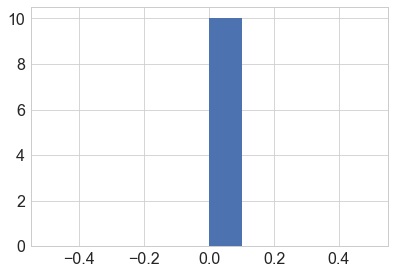

In [58]:
s[np.where( (s>1) )] = 0
count, bins, ignored = plt.hist(s, 10, normed=True)


In [64]:
count, boundaries = np.histogram(s, bins=10, density=True)
denom = sum(np.diff(boundaries)*np.sqrt(1+count**2))

U = np.sqrt(1+(2-1)**2)/denom
(U-0.707)/(1-0.707)

0.12073095937549529

In [60]:
denom

1.9990004999998734

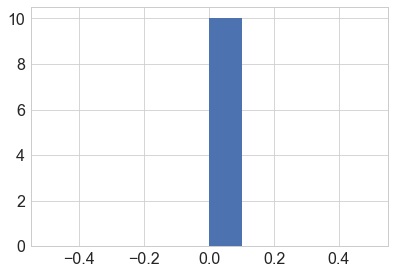

In [62]:
count, bins, ignored = plt.hist(s, 10, normed=True)
